# I. INTRODUCTION

**Project Name**: PRiceWise  
**Team Members**: Abdul Aziz, M. Noerhadi, Rafina Dhiya P., Yasmin Naila R.  

**Data Source**: Scraped from Rumah123  
**Objective**: Develop a model to provide competitive house price recommendations for sellers.

# II. IMPORT LIBRARY

In [2]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Statistics
from scipy.stats import (
    iqr,
    pearsonr,
    spearmanr,
    kendalltau,
    normaltest
)

# Data splitting
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

# Imputer
from sklearn.impute import KNNImputer

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Metrics
from sklearn.metrics import r2_score, mean_absolute_error

# Saving and loading models
import pickle


# III. DATA LOADING

In [3]:
pd.set_option("display.max_columns", 500)
raw_data= pd.read_csv("data/Property_Scraping.csv")
data = raw_data.copy()
data

,url,title,description,price,address,city,land_size_m2,building_size_m2,bedroom,bathroom,garage,carport,property_type,certificate,voltage_watt,maid_bedroom,maid_bathroom,kitchen,dining_room,living_room,furniture,building_material,floor_material,floor_level,house_facing,concept_and_style,view,internet_access,road_width,year_built,year_renovated,water_source,corner_property,property_condition,ad_type,ad_id
0,/properti/tangerang/hos16543378/,Rumah 2 Lantai Bagus Semi Furnished Sertifikat...,Dijual Termurah Rumah Budi Indah Daan Mogot Si...,8.500000e+08,"Daan Mogot, Tangerang",Tangerang,57,114.0,3.0,2.0,1.0,1.0,Rumah,SHM - Sertifikat Hak Milik,2200.0,1.0,0.0,0.0,0.0,0.0,Semi Furnished,NaN,NaN,2.0,NaN,NaN,NaN,NaN,Row Jalan 2 Mobil,NaN,NaN,Pam,False,Full Renovasi,NaN,NaN
1,/properti/jakarta-selatan/hos18392523/,Rumah Asri Dan Eklusive Dikawasan Pemukiman Po...,Dijual Rumah Asri dan Nyaman di lingkungan yan...,4.950000e+09,"Kebayoran Lama, Jakarta Selatan",Jakarta Selatan,320,450.0,5.0,3.0,0.0,2.0,Rumah,SHM - Sertifikat Hak Milik,4400.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,2.0,NaN,Moderen dan Eklusive,NaN,NaN,2 Mobil,NaN,NaN,NaN,NaN,terawat,Dijual Cepat,NaN
2,/properti/depok/hos18570241/,Rumah Di Perum Lereng Indah Cinere Perbatasan ...,"Dijual Cepat Rumah Di Perum Lereng Indah, Pond...",5.900000e+08,"Perum Lereng Indah, Pondok Cabe, Cinere",Depok,78,36.0,2.0,1.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,1200.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,East,NaN,NaN,NaN,1mobil,NaN,NaN,Air tanah,False,NaN,Dijual Cepat,NaN
3,/properti/jakarta-utara/hos16808954/,DIJUAL TERMURAH RUMAH PIK1 Layar Permai 2 Lant...,DIJUAL TERMURAH RUMAH PIK1 Layar Permai 4x12 2...,1.750000e+09,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,48,96.0,2.0,2.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,2200.0,1.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2 Mobil,NaN,NaN,NaN,NaN,Rapi Terawat,DIJUAL,NaN
4,/properti/jakarta-selatan/hos16169877/,"Dijual Rumah Di Guntur Area Komersil, Setiabud...","Dijual Rumah di Guntur Area Komersil, Setiabud...",6.700000e+09,"Guntur, Jakarta Selatan",Jakarta Selatan,180,135.0,2.0,1.0,0.0,2.0,Rumah,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,0.0,East,NaN,NaN,NaN,2 mobil,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,/properti/cianjur/las2606466/,"Tanah Lahan Murah Siap Bangun Luas 5,8 Hektar ...",Jual Segera Tanah Lahan Murah Siap Bangun Deng...,1.740000e+10,"Cikalongkulon, Cianjur",Cianjur,58235,0.0,NaN,0.0,0.0,0.0,NaN,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dijual,las2606466
1394,/properti/bogor/was2874809/,Gudang Murah Dengan Luas 5.000m di Tengsaw Cit...,Jual Cepat Gudang Murah Dengan Luas 5.000m di ...,2.700000e+10,"Citeureup, Bogor",Bogor,5000,2000.0,2.0,2.0,0.0,0.0,NaN,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,Dijual,was2874809
1395,/properti/depok/hos5443725/,"Rumah 1 lantai didalam cluster di Krukut Limo,...",Hanya 3 km ke Jakarta Selatan 300m dari pintu ...,1.150000e+09,NaN,Depok,102,70.0,2.0,2.0,0.0,0.0,Rumah,SHM - Sertifikat Hak Milik,NaN,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,/properti/jakarta-pusat/hos8665955/,Rumah murah tangerang siap huni 2 kamar tidur ...,Puri Harmoni Cikasungka\n\nRumah Subsidi Pemer...,1.680000e+08,"Tanah Abang, Jakarta Pusat",Jakarta Pusat,60,28.0,2.0,1.0,0.0,1.0,Rumah,SHM - Sertifikat Hak Milik,1300.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# IV. EDA

## Check Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 1398 non-null   object 
 1   title               1396 non-null   object 
 2   description         1396 non-null   object 
 3   price               1396 non-null   float64
 4   address             1299 non-null   object 
 5   city                1396 non-null   object 
 6   land_size_m2        1398 non-null   int64  
 7   building_size_m2    1398 non-null   float64
 8   bedroom             1224 non-null   float64
 9   bathroom            1394 non-null   float64
 10  garage              1330 non-null   float64
 11  carport             1392 non-null   float64
 12  property_type       1046 non-null   object 
 13  certificate         1395 non-null   object 
 14  voltage_watt        909 non-null    float64
 15  maid_bedroom        1393 non-null   float64
 16  maid_b

## Check Duplicate

In [5]:
data.duplicated().sum()

0

In [6]:
data.url.duplicated().sum()

2

## Handling Duplicate

In [7]:
data = data.drop_duplicates()

print(data.duplicated().sum())

0


In [8]:
data = data.drop_duplicates(subset="url")
data.url.duplicated().sum()

0

## Check Unique Value and Cardinality

In [9]:
def unique_check_all(df):
    # Tampilan dengan max column
    pd.set_option('display.max_colwidth', None)

    # output bernama listItem
    listItem = []

    # Looping column di dalam dataframe
    for col in df.columns:
        # Menambahkan 'nama kolom', 'jumlah nilai unique', 'nilai unique' ke listItem
        listItem.append([col, df[col].nunique(), df[col].unique()])

    # Hasil dalam dataframe
    summary_cardinality= pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

    return summary_cardinality

In [10]:
unique_check_all(data)

nama kolom  jumlah nilai unique  \
0                  url                 1396   
1                title                 1345   
2          description                 1339   
3                price                  429   
4              address                  534   
5                 city                   42   
6         land_size_m2                  420   
7     building_size_m2                  342   
8              bedroom                   29   
9             bathroom                   26   
10              garage                   13   
11             carport                   13   
12       property_type                    3   
13         certificate                   25   
14        voltage_watt                   61   
15        maid_bedroom                    6   
16       maid_bathroom                    5   
17             kitchen                    4   
18         dining_room                    3   
19         living_room                    4   
20           furniture                    3   
21   building_material                   47   
22      floor_material                   39   
23         floor_level                   29   
24        house_facing                    8   
25   concept_and_style                   69   
26                view                   64   
27     internet_access                   24   
28          road_width                  145   
29          year_built                   24   
30      year_renovated                    5   
31        water_source                  120   
32     corner_property                    2   
33  property_condition                  126   
34             ad_type                   17   
35               ad_id                  567   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## Handling Cardinality

### 1. Price

In [11]:
# Rename the column and convert the values to millions
data = data.rename(columns={"price": "price_mio"})
data["price_mio"] = data["price_mio"] / 1_000_000

### 2. City

In [12]:
data.loc[:, 'city'] = data['city'].apply(lambda x: x.split(', ')[1] if isinstance(x, str) and ', ' in x else x)

# List kata kunci untuk kota Jabodetabek (menggunakan kata kunci seperti 'Jakarta' dan 'Bogor')
jabodetabek_keywords = ['Jakarta', 'Bogor', 'Depok', 'Tangerang', 'Bekasi']

# Filter untuk hanya menyertakan data dengan kota yang mengandung kata kunci Jabodetabek
data = data[data['city'].str.contains('|'.join(jabodetabek_keywords), case=False, na=False)]

In [13]:
# Keywords for classification
keywords = {
    r'jakarta': 'Jakarta',
    r'bogor': 'Bogor',
    r'depok': 'Depok',
    r'tangerang': 'Tangerang',
    r'bekasi': 'Bekasi'
}

# Step 1: Classification based on 'address' column
for pattern, city_name in keywords.items():
    data.loc[
        data['city'].isna() & data['address'].str.contains(pattern, case=False, na=False),
        'city'
    ] = city_name

# Step 2: Classification based on 'title' column
for pattern, city_name in keywords.items():
    data.loc[
        data['city'].isna() & data['title'].str.contains(pattern, case=False, na=False),
        'city'
    ] = city_name

# Step 3: Standardize the city column using regex
for pattern, city_name in keywords.items():
    data['city'] = data['city'].str.replace(rf'.*{pattern}.*', city_name, case=False, regex=True)

# Step 4: Remove any additional spaces and ensure consistency
data['city'] = data['city'].str.strip()

# Verify the output
print(data['city'].value_counts())

city
Jakarta      823
Tangerang    224
Bogor        124
Bekasi        94
Depok         74
Name: count, dtype: int64


### 3. Property Type

In [14]:
# Daftar kata kunci
keywords = {
    r'rumah|house|mansion': 'Rumah',
    r'apartment|apartmen|apartement|apartemen|kos|kost': 'Hunian Sewa',
    r'pabrik|kantor|office|ruko|ruang usaha|kios|kiosk|gudang': 'Ruang Usaha',
    r'tanah|lahan|kavling|gedung': 'Tanah dan Properti Lain'
}

# Normalisasi awal
data['property_type'] = data['property_type'].str.lower().str.strip()

# Klasifikasi berdasarkan 'property_type'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi berdasarkan 'title'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].isna() & data['title'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi berdasarkan 'description'
for pattern, prop_type in keywords.items():
    data.loc[
        data['property_type'].isna() & data['description'].str.contains(pattern, case=False, na=False),
        'property_type'
    ] = prop_type

# Klasifikasi tipe rumah berdasarkan ukuran bangunan
def determine_house_type(row):
    if row['property_type'] == 'Rumah':
        size = row.get('building_size_m2', None)
        if size is None:
            return 'Unknown House Type'
        elif size <= 21:
            return 'House Type 21'
        elif 21 < size <= 36:
            return 'House Type 36'
        elif 36 < size <= 45:
            return 'House Type 45'
        elif 45 < size <= 54:
            return 'House Type 54'
        elif 54 < size <= 60:
            return 'House Type 60'
        elif 60 < size <= 70:
            return 'House Type 70'
        elif 70 < size <= 120:
            return 'House Type 120'
        else:
            return 'House Type >120'
    return row['property_type']  # Return original property_type for non-Rumah rows

# Update property_type with house_type where applicable
data['property_type'] = data.apply(determine_house_type, axis=1)

# Output hasil
data.property_type.value_counts()

property_type
House Type >120            706
House Type 120             233
Ruang Usaha                100
Tanah dan Properti Lain     90
Hunian Sewa                 79
House Type 70               34
House Type 60               26
House Type 36               24
House Type 54               24
House Type 45               17
House Type 21                6
Name: count, dtype: int64

In [15]:
data = data[(data['property_type'] != 'Tanah dan Properti Lain') &
                 (data['property_type'] != 'Hunian Sewa') &
                 (data['property_type'] != 'Ruang Usaha')]

data.property_type.unique()

array(['House Type 120', 'House Type >120', 'House Type 36',
       'House Type 70', 'House Type 54', 'House Type 45', 'House Type 60',
       'House Type 21'], dtype=object)

### 4. Certificate

In [16]:
# Define a function to categorize values
def certificate(value):
    if pd.isna(value):  # Handle NaN values
        return np.nan
    elif 'SHM' in value:  # If the value contains 'SHM'
        return 'SHM'
    elif 'HGB' in value:  # If the value contains 'HGB'
        return 'HGB'
    else:  # If the value doesn't contain 'SHM' or 'HGB'
        return 'Other'

# Apply the function to the 'certificate' column directly
data.loc[:,'certificate'] = data['certificate'].apply(certificate)

data.certificate.value_counts()

certificate
SHM      885
Other    133
HGB       49
Name: count, dtype: int64

### 5. Property Condition

In [17]:
# Fungsi untuk mengelompokkan berdasarkan kesamaan kata
def categorize(value):
    if pd.isnull(value):  # Tetap NaN jika value adalah NaN
        return pd.NA
    
    value_lower = str(value).lower()
    
    # Renovated: Properti yang telah direnovasi
    renovated_keywords = ['renov', 'full renov', 'renovasi', 'renoved', 'renovasi baru', 'baru renovasi', 'finished', 'selesai renovasi', 'proses finishing']
    if any(keyword in value_lower for keyword in renovated_keywords):
        return 'Renovated'
    
    # New: Properti yang baru atau baru dibangun
    new_keywords = ['new', 'brand new', 'baru', 'unit baru', 'first time', 'primery', 'full baru', 'baru selesai', 'unit baru gress']
    if any(keyword in value_lower for keyword in new_keywords):
        return 'New'
    
    # Need Renovation: Properti yang membutuhkan renovasi atau perawatan
    need_renovation_keywords = ['butuh renovasi', 'harus renovasi', 'setengah jadi', 'perlu renovasi', 'perlu perawatan', 'lama', 'tua']
    if any(keyword in value_lower for keyword in need_renovation_keywords):
        return 'Need Renovation'
    
    # Well Maintained: Properti yang terawat dan siap huni
    well_maintained_keywords = ['terawat', 'siap huni', 'bersih', 'rapi', 'kokoh', 'bagus', 'layak huni', 'ready to move', 'well maintained', 'layak', 'baik', 'well']
    if any(keyword in value_lower for keyword in well_maintained_keywords):
        return 'Well Maintained'
    
    # Jika tidak cocok dengan kategori apapun, beri nilai NaN (opsional)
    return pd.NA

# Terapkan fungsi kategori
data.loc[:,'property_condition'] = data['property_condition'].apply(lambda x: categorize(x))

data.property_condition.value_counts()

property_condition
Well Maintained    138
New                103
Renovated           25
Need Renovation     17
Name: count, dtype: int64

### 6. Water Source

In [18]:
keywords_water = {
    'PAM/PDAM': r'\b(?:pam|pdam|air pam|air pdam|pln pam|aetra|water treatment|palyja)\b',
    'Sumber Air': r'\b(?:sumur|jet pump|jetpump|sumur bor|air sumur|bor|tanah|air tanah|filter|osmosis|reverse osmosis|sistem filter|pompa|submersible pump|water pump|mata air|air alami|wtp|jetpam|air jet pum|air ready|langsung dari sumbernya|air bagus|sumber air)\b',
    'Gabungan': r'\b(?:pdam\s?\+?\s?sumur|pam\s?\+?\s?tanah|air jetpump)\b'
}

data['water_source'] = data['water_source'].str.lower().str.strip()

# Check and classify rows where 'water_source' is not missing
for category, pattern in keywords_water.items():
    data.loc[data['water_source'].str.contains(pattern, case=False, na=False), 'water_source'] = category

# Step 2: Handle missing 'water_source' values by checking the 'description' for matching keywords
for category, pattern in keywords_water.items():
    data.loc[data['water_source'].isna() & data['description'].str.contains(pattern, case=False, na=False), 'water_source'] = category

# Periksa distribusi kategori
data.water_source.value_counts()


water_source
Sumber Air    553
PAM/PDAM      238
Name: count, dtype: int64

### 7. Road Width

In [19]:
def convert_to_meter(value):
    if pd.isnull(value):  # Jika nilai NaN
        return np.nan
    
    value_lower = str(value).lower()
    
    # Ukuran dalam meter eksplisit
    if 'meter' in value_lower or 'mtr' in value_lower:
        match = re.search(r'(\d+\.?\d*)\s?(meter|mtr)', value_lower)
        if match:
            return float(match.group(1))
    
    # Kondisi 1 mobil
    if any(keyword in value_lower for keyword in ['1 mobil', '1mobil', '1 mbl', '1 arah mobil']):
        return 2.5
    
    # Kondisi 2 mobil
    if any(keyword in value_lower for keyword in ['2 mobil', '2 mobil lega', '2-3 mobil', '2 mobil pas', '2 mbl', 'akses jalan 2 mobil', '2 mobil 2 arah', 'row jalan 2 mobil', '2.5 mobil', '2mob', '2row']):
        return 5
    
    # Kondisi 3 mobil
    if any(keyword in value_lower for keyword in ['3 mobil', '3 row', '3 mbl', 'jalan 3 mobil', 'row jalan 3 mobil', '3 mobil lebih', '3mob']):
        return 7.5
    
    # Kondisi 4 mobil
    if any(keyword in value_lower for keyword in ['4 mobil', '4 mbl']):
        return 10
    
    # Kondisi lebih dari 4 mobil
    if any(keyword in value_lower for keyword in ['5 mobil', '6 mobil', '7 mobil', '8 mobil', 'lebih dari 4 mobil']):
        return 12
    
    # Kondisi lebar jalan besar atau akses jalan lebar
    if any(keyword in value_lower for keyword in ['lebar', 'besar', 'akses jalan', 'jalan besar']):
        return 5
    
    # Kondisi "super lebar"
    if 'super lebar' in value_lower:
        return 15
    
    # Jika tidak cocok dengan kategori apapun, beri nilai NaN (opsional)
    return np.nan

# Terapkan konversi ke meter
data.loc[:,'road_width'] = data['road_width'].apply(convert_to_meter)
# Convert 'voltage_watt' to float, with error handling for non-numeric values
data.road_width = pd.to_numeric(data['road_width'], errors='coerce')

data["road_width"].unique()

array([ 5. ,  2.5,  nan,  7.5,  8. , 45. ,  6. ,  7. , 10. ,  9. , 12. ])

## Check Missing Value

In [20]:
data.isnull().sum()

url                      0
title                    0
description              0
price_mio                0
address                 65
city                     0
land_size_m2             0
building_size_m2         0
bedroom                 23
bathroom                 2
garage                  66
carport                  4
property_type            0
certificate              3
voltage_watt           291
maid_bedroom             3
maid_bathroom           16
kitchen                144
dining_room            199
living_room            192
furniture              210
building_material     1004
floor_material        1012
floor_level             31
house_facing           721
concept_and_style      935
view                  1023
internet_access       1027
road_width             847
year_built            1027
year_renovated        1061
water_source           279
corner_property        715
property_condition     787
ad_type                586
ad_id                  785
dtype: int64

## Numerical and Categorical Column

In [21]:
# Select numeric columns
num_cols = ['land_size_m2',
            'building_size_m2',
            'road_width',
            'maid_bedroom',
            'maid_bathroom',
            'kitchen',
            'floor_level',
            'bedroom',
            'bathroom',
            'garage',
            'carport',
            'voltage_watt']

cat_cols = ['city',
            'property_type',
            'certificate',
            'furniture',
            'house_facing',
            'water_source',
            'property_condition'
            ]

df = data[['land_size_m2',
          'building_size_m2',
          'road_width',
          'city',
          'property_type',
          'certificate',
          'furniture',
          'house_facing',
          'water_source',
          'property_condition',
          'bedroom',
          'bathroom',
          'garage',
          'carport',
          'voltage_watt',
          'maid_bedroom',
          'maid_bathroom',
          'kitchen',
          'floor_level',
          'price_mio']]

## Drop Data

The data used will only include data up to Q3, as testing results show that the model is not optimal for predicting data with prices above 5.8 billion.

In [22]:
data.price_mio.describe()

count      1070.000000
mean       5653.216309
std       10503.780845
min           0.000007
25%        1450.000000
50%        2800.000000
75%        5800.000000
max      125000.000000
Name: price_mio, dtype: float64

In [23]:
df = df[df["price_mio"]<5800.000000]

## EDA Visualization

### 1. Property Type

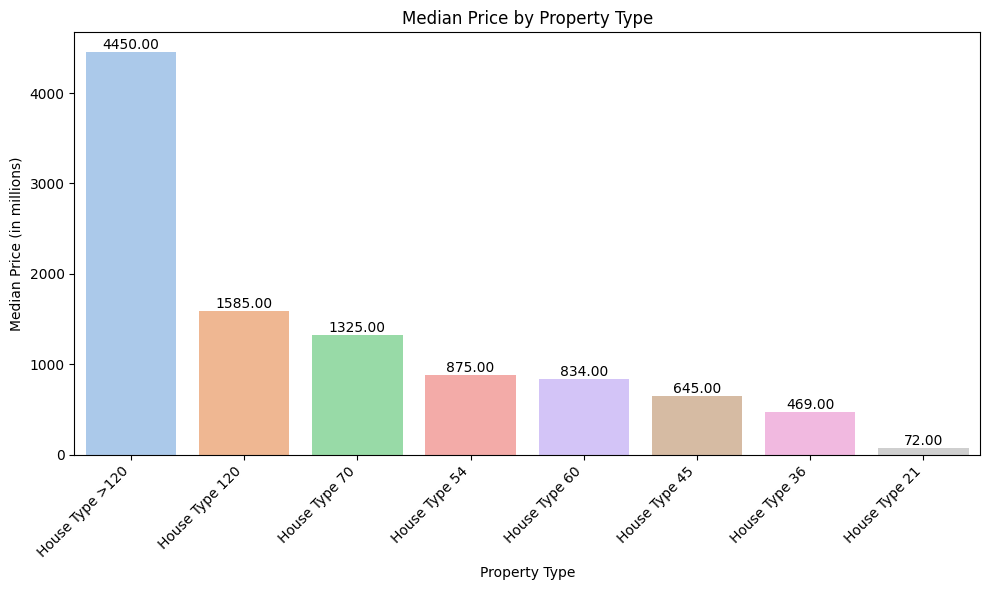

In [24]:
# Calculate the median price for each property type
median_prices = data.groupby('property_type')['price_mio'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=median_prices.index,
    y=median_prices.values,
    hue=median_prices.index,  # Assign `x` to `hue` to specify coloring
    dodge=False,  # Prevents the hue from separating the bars
    palette='pastel',
    legend=False  # Removes the legend if not needed
)
plt.xlabel('Property Type')
plt.ylabel('Median Price (in millions)')
plt.title('Median Price by Property Type')
plt.xticks(rotation=45, ha='right')

# Add the median price values on top of each bar
for i, v in enumerate(median_prices.values):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

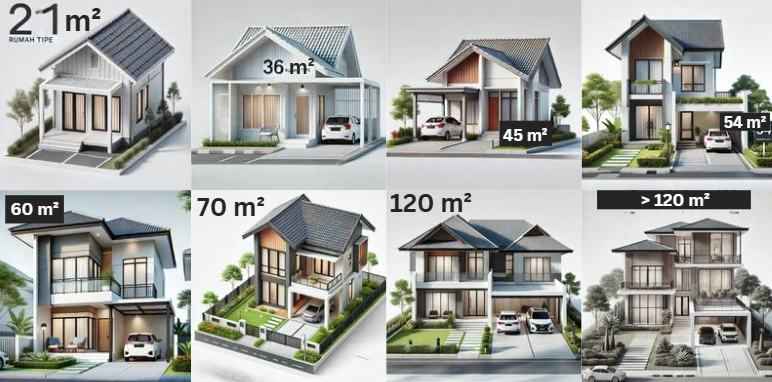

House prices are clearly categorized by type:  
- **House Type >120** is ideal for the premium market with the highest prices.  
- **House Types 36 and 21** are suitable for buyers with lower budgets.  
- **House Types 120 and 70** are highly sought after by the middle-income segment.  

### 2. City

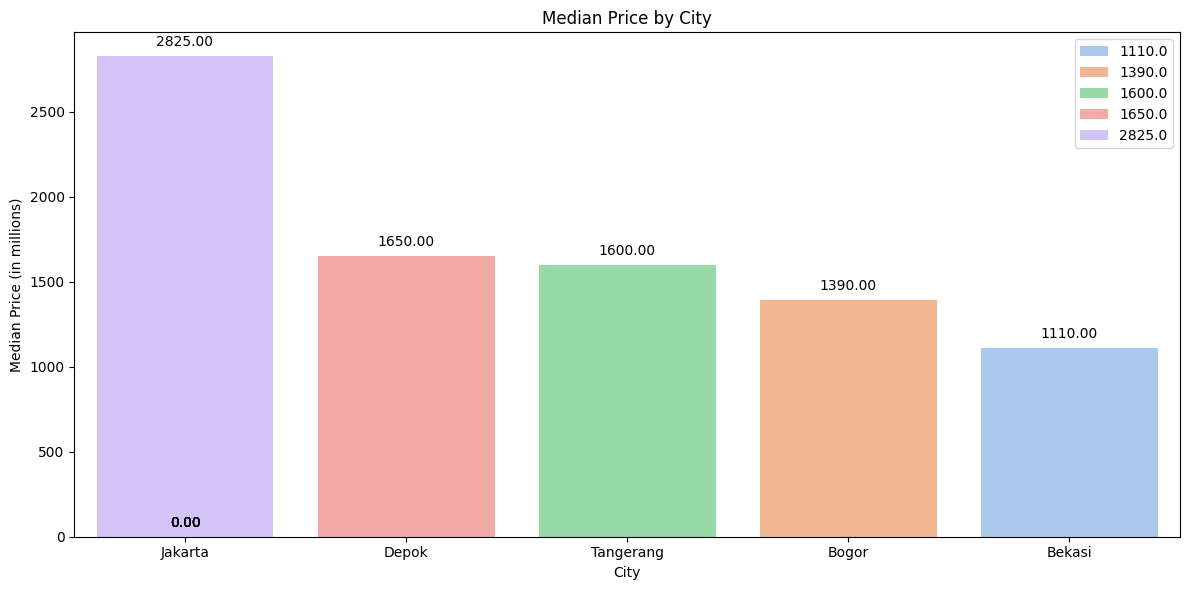

In [25]:
# Calculate median price per city and sort in descending order
city_price = df.groupby('city')['price_mio'].median().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_price.index, hue=city_price.values ,y=city_price.values, palette="pastel")
plt.xticks(rotation=0, ha='center')  # Horizontal x-axis labels
plt.xlabel('City')
plt.ylabel('Median Price (in millions)')
plt.title('Median Price by City')

# Add the price labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.tight_layout()
plt.show()

1. **Jakarta Has the Highest Median Price**:  
   - The median price in Jakarta reaches **4.2 billion**, significantly higher than other cities due to its role as a business and government hub.  

2. **Depok and Tangerang as Popular Alternatives**:  
   - The median price in **Depok** (1.82 billion) and **Tangerang** (1.75 billion) remains high due to their proximity to Jakarta, making them popular choices for workers.  

3. **Bogor and Bekasi Are More Affordable**:  
   - **Bogor** (1.39 billion) and **Bekasi** (1.18 billion) offer lower prices, appealing to buyers with limited budgets.  

4. **Price Gap**:  
   - Jakarta's prices are nearly **2.5 times** higher than Bekasi, reflecting high demand in the capital.  

---

**Recommendations**:  
- Focus on properties in **Depok** and **Tangerang** as alternatives for homes near Jakarta.  
- Promote **Bogor** and **Bekasi** to attract budget-conscious buyers.  
- Properties in **Jakarta** are ideal for the premium market.  

Surrounding cities offer attractive options for buyers seeking more affordable prices.

### 3. Certificate

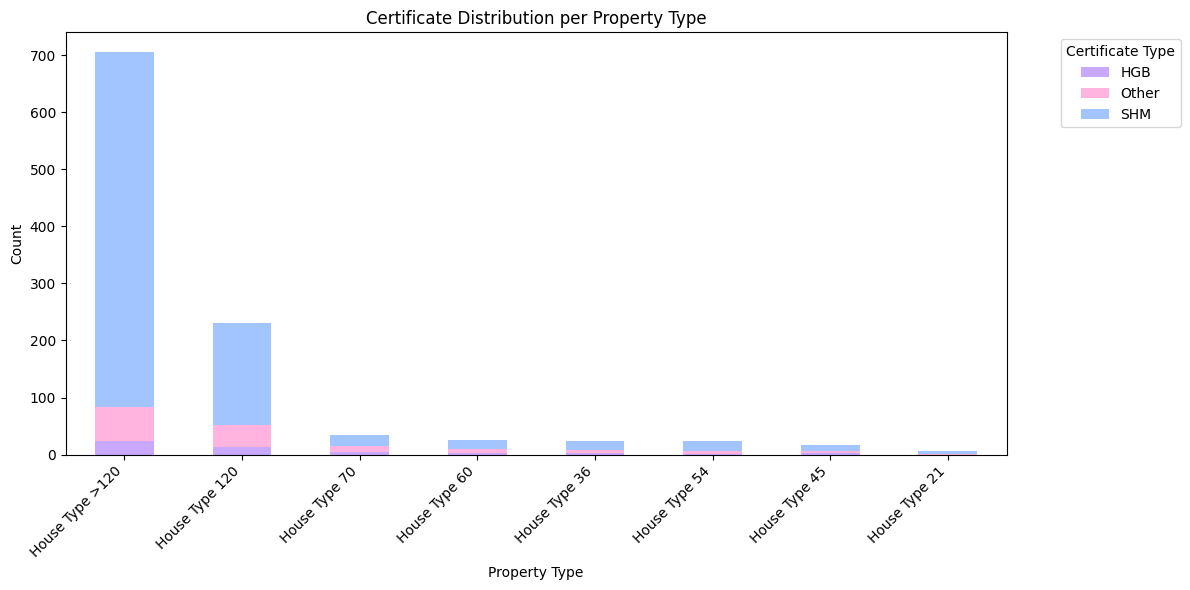

In [26]:
# Group data by 'property_type' and 'certificate' then count occurrences
certificate_counts = data.groupby(['property_type', 'certificate']).size().unstack(fill_value=0)

# Urutkan dari property_type dengan total terbanyak ke paling sedikit
certificate_counts['Total'] = certificate_counts.sum(axis=1)
certificate_counts = certificate_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Custom pastel colors: ungu, pink, dan biru
custom_pastel = ['#C9A9FF', '#FFB3DE', '#A2C5FF', '#D5A6BD', '#B5A1E5', '#FFC3F1', '#BAE1FF']

# Plot stacked bar chart
ax = certificate_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=custom_pastel[:len(certificate_counts.columns)]  # Gunakan warna sesuai jumlah kolom
)
plt.title('Certificate Distribution per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Certificate Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.tight_layout()
plt.show()

**Certificate Type:**  

**Key Differences:**  
- **SHM (Sertifikat Hak Milik)**: Full ownership for an **unlimited period**.  
- **HGB (Hak Guna Bangunan)**: Ownership of **buildings only**, with a limited validity period.  

- **Other Types**:  
  1. **PPJB** - **Sale and Purchase Binding Agreement**  
  2. **Girik** - **Traditional Land Letter** (proof of ownership of customary land, not yet an official certificate)  
  3. **Adat** - **Traditional Land Ownership Letter**  
  4. **Strata** - **Strata Title** (shared ownership rights in multi-story buildings like apartments)  
  5. **HGB until 2031** - **Building Use Rights until 2031** (specific HGB validity period)  
  6. **AJB** - **Deed of Sale and Purchase** (legal deed for land/building transactions)  
  7. **ppjb** - **Sale and Purchase Binding Agreement** (alternative writing of PPJB)  
  8. **Not Specified** - Not Specified  
  9. **PJB** - **Sale and Purchase Binding**  
  10. **SHMSRS** - **Ownership Certificate for Flats** (for apartment or flat units)  
  11. **HP (Hak Pakai)** - **Usage Rights** (rights to use land owned by the state or others)  
  12. **AJB PBB** - **Deed of Sale and Purchase + Land and Building Tax**  
  13. **AJB (Girik)** - **Deed of Sale and Purchase with Girik Letter**  
  14. **P3U** - **Land Use or Utilization Agreement**  

---

**Certificates in the "Other" category are more commonly used than HGB because:**  

1. **Many properties are still in the legalization process**:  
   - Certificates such as **PPJB** (Sale and Purchase Binding Agreement), **AJB** (Deed of Sale and Purchase), or **PJB** are initial steps in property transactions before final certificates like SHM or HGB are issued.  

2. **Certificates have not been converted to official titles**:  
   - Some properties still use **traditional certificates** like **Girik** or **Adat**, which have not been upgraded to SHM or HGB.  
   - This often occurs due to financial constraints, time limitations, or administrative challenges.  

Thus, the **Other** category encompasses various temporary or traditional certificates that have not yet transitioned into formal legal titles like **SHM** or **HGB**.  

---

1. **Certificates can be upgraded** from HGB, AJB, or Girik to **SHM**, especially when the aim is private ownership.  
2. This process is conducted through **BPN** (National Land Agency) by completing the required administrative documents and associated fees.  
3. Buyers often prefer **SHM** due to its stronger legal status, greater security, and higher value in the property market.  

### 4. Water Source

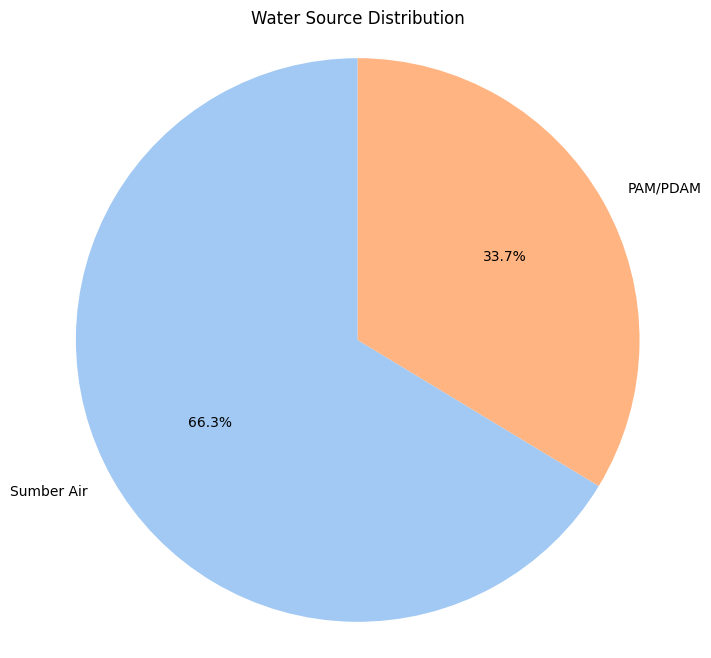

In [27]:
# Calculate the counts for each water source category
water_source_counts = df['water_source'].value_counts()

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel", len(water_source_counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(water_source_counts, labels=water_source_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
plt.title('Water Source Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

---

Variations in water sources are classified into **two main categories**:

**1. PAM/PDAM Category**  
Water sources originating from government/private clean water networks or combinations involving PAM:  
- PAM, PDAM, Palyja, Aetra, PAM Bintaro  
- PDAM + Well, PAM & Groundwater, PAM + Jet Pump  
- PDAM and Jet Pump, PDAM Water + Well, WTP (Water Treatment Plant)  
- PAM & Well, PAM and bore well, PLN PAM + WELL  
- Aetra PAM Water, PDAM PAM, PAM Water, PDAM Water  
- WTP Paljaya, PAM & Jet Pump, PAM & Bore  
- Water treatment from PT BSD, WTP PAM process  
- Combinations such as: **PAM and Bore Water, PAM and Well, PAM + Groundwater**

**2. Independent Water Source Category**  
Water sources originating from wells, groundwater, jet pumps, or independent combinations:  
- Well Water, Bore Well, Jet Pump, Groundwater  
- Jet Pump Well Water, Well + Jet Pump, Jet Pump, Clear Jet Pump  
- Water Pump, Satellite Pump, Submersible Pump, Groundwater Jet Pump  
- Springs, RO (Reverse Osmosis) Filter System, Own Water Source  
- Jet Pump Water, Deep Well Water, Bore Well (Jet Pump)  
- 60m Deep Well, 2 Wells + 2 Jet Pumps  
- Clear and good groundwater, Tank Jet Pump Well Water  
- Well / Bore / Jet Pump, Booster Jet Pump, Ready Water  
- Water Pump and Water Torrent  
- Combinations such as: **Jet Pump Water + Well, Well Water + Jet Pump, Jet Pump Well**

---

Water sources are divided into **two main categories**:

1. **PAM/PDAM**:  
   - Water sourced from government/private networks or combined with PAM.  

2. **Independent Water Sources**:  
   - Private water sources such as **wells, groundwater, jet pumps, or personal pumps**.  

---

**Conclusion**

People tend to use **independent water sources** more frequently because:  

1. They are **more cost-effective** compared to monthly PAM/PDAM bills.  
2. **Limited PAM/PDAM networks** in certain areas.  
3. **Better control over water quality** from bore wells or jet pumps.  
4. A sense of **independence** and reduced reliance on government supply.  
5. The ability to obtain **larger water capacity** based on needs.  

### 5. Property Condition

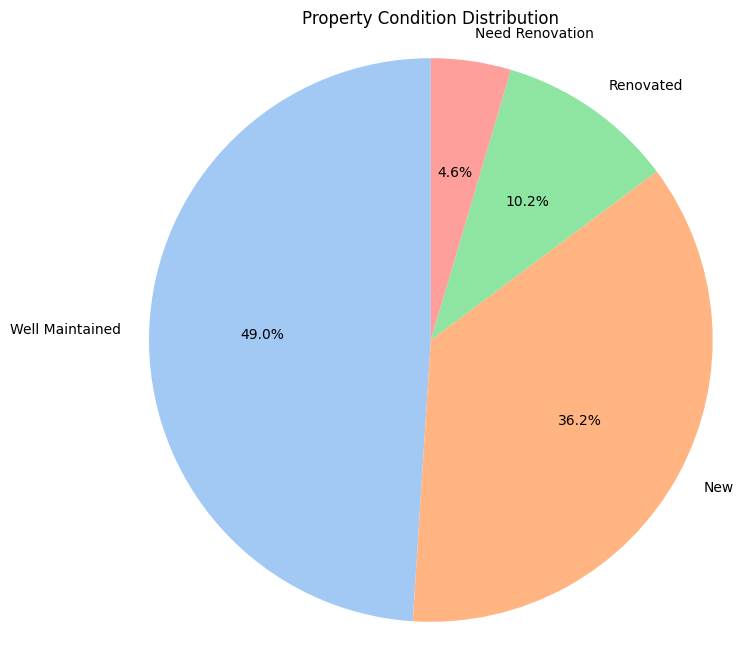

In [28]:
# Calculate the counts for each property condition category
property_condition_counts = df['property_condition'].value_counts()

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel", len(property_condition_counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(property_condition_counts, labels=property_condition_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors)
plt.title('Property Condition Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- **60.5%** of properties are in **Well Maintained** condition, reflecting a **high standard of property upkeep** in the area.  
- **New properties** (28%) indicate potential area development and strong interest in modern housing.  
- The **low percentage of properties needing renovation** (4%) highlights the generally good condition of properties overall.  

When linked to sales strategies:  
- Focus on **Well Maintained** and **New** properties as key selling points for buyers.  
- “Need Renovation” properties offer an **investment opportunity** for buyers looking to renovate and resell.  

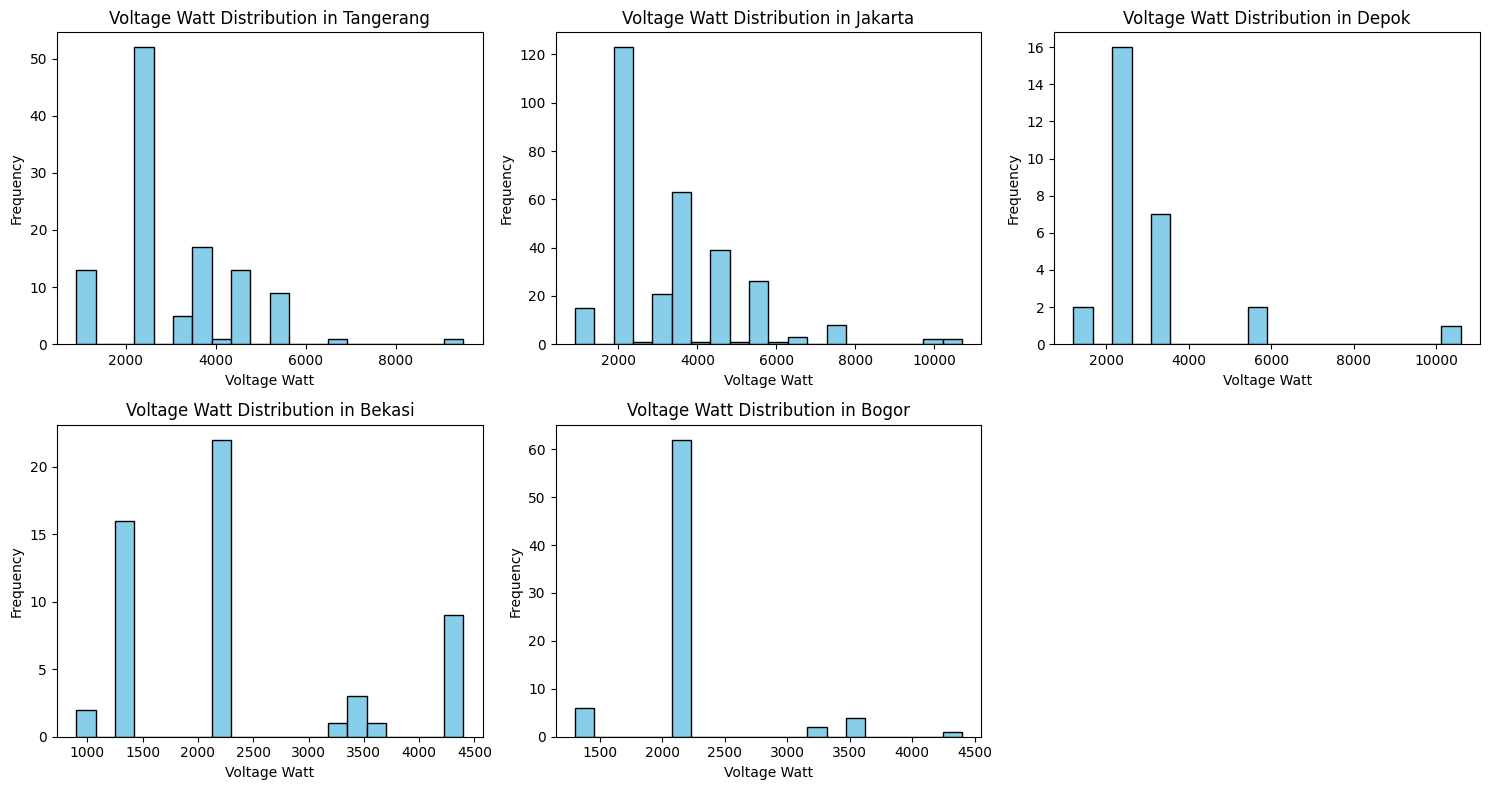

In [29]:
def plot_voltage_watt_by_city(df):
    """Plots voltage_watt distribution for each city in two rows."""
    cities = df['city'].unique()
    n_cities = len(cities)
    rows = 2  # Number of rows in the subplot grid
    cols = (n_cities + 1) // rows  # Calculate the number of columns

    fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Adjust figsize as needed
    
    for i, city in enumerate(cities):
        city_df = df[df['city'] == city]

        row = i // cols
        col = i % cols

        axes[row, col].hist(city_df['voltage_watt'], bins=20, color='skyblue', edgecolor='black')
        axes[row, col].set_title(f'Voltage Watt Distribution in {city}')
        axes[row, col].set_xlabel('Voltage Watt')
        axes[row, col].set_ylabel('Frequency')
    
    # Hide any unused subplots if the number of cities is not a multiple of cols
    for i in range(n_cities, rows * cols):
        row = i // cols
        col = i % cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


plot_voltage_watt_by_city(df)

- The majority of houses in these five cities use standard electricity power (2,200 watts), reflecting basic household needs.  
- Jakarta has a significantly higher proportion of high power usage, likely due to commercial properties or luxury homes.  
- Cities like Bogor and Bekasi show a distribution pattern more focused on standard household power needs.

### Visualization Conclusion

In addition to key features such as land area, building size, bedrooms, and bathrooms, it was found that the house price is also influenced by the type of house and location. Other factors such as water source, electricity power, and additional amenities also have an impact. Therefore, PRiceWise is here to help sellers predict house prices more accurately and competitively based on these data.

# V. FEATURE ENGINEERING

## Split X (Features) and y (Target)

In [30]:
# Split kolom features dan target
X = df.drop('price_mio', axis=1) # Features
y = df['price_mio']               # Target

In [31]:
# Split dataset into training+validation and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=999)

## Handling Missing Value

In [32]:
def impute_with_knn(X_train, X_test, num_cols, cat_cols):
    # Create deep copies to avoid modifying original dataframes
    X_train_imputed = X_train.copy(deep=True)
    X_test_imputed = X_test.copy(deep=True)
    
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}
    
    # Encode categorical columns
    def encode_categorical(df, cat_cols, label_encoders):
        df_encoded = df.copy(deep=True)
        for col in cat_cols:
            if col not in label_encoders:
                # Combine unique categories from train and test to fit encoder
                combined_categories = pd.concat([X_train[col], X_test[col]]).unique()
                le = LabelEncoder()
                le.fit(combined_categories[~pd.isna(combined_categories)].astype(str))  # Ignore NaN
                label_encoders[col] = le
            
            # Encode the column (leave NaN as is for imputing later)
            le = label_encoders[col]
            df_encoded[col] = df_encoded[col].apply(
                lambda x: le.transform([str(x)])[0] if pd.notna(x) else np.nan
            )
        return df_encoded

    # Encode train and test datasets
    X_train_encoded = encode_categorical(X_train_imputed, cat_cols, label_encoders)
    X_test_encoded = encode_categorical(X_test_imputed, cat_cols, label_encoders)
    
    # Combine numeric and encoded categorical columns for imputing
    cols_to_impute = num_cols + cat_cols
    X_train_to_impute = X_train_encoded[cols_to_impute]
    X_test_to_impute = X_test_encoded[cols_to_impute]
    
    # Apply KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5)
    X_train_imputed_values = knn_imputer.fit_transform(X_train_to_impute)
    X_test_imputed_values = knn_imputer.transform(X_test_to_impute)
    
    # Update the imputed values back to dataframes
    X_train_imputed[cols_to_impute] = X_train_imputed_values
    X_test_imputed[cols_to_impute] = X_test_imputed_values
    
    # Decode categorical columns back to original values
    def decode_categorical(df, cat_cols, label_encoders):
        df_decoded = df.copy(deep=True)
        for col in cat_cols:
            le = label_encoders[col]
            df_decoded[col] = df_decoded[col].apply(
                lambda x: le.inverse_transform([int(x)])[0] if pd.notna(x) else np.nan
            )
        return df_decoded

    # Decode train and test datasets
    X_train_imputed = decode_categorical(X_train_imputed, cat_cols, label_encoders)
    X_test_imputed = decode_categorical(X_test_imputed, cat_cols, label_encoders)
    
    return X_train_imputed, X_test_imputed

X_train_imputed, X_test_imputed = impute_with_knn(X_train, X_test, num_cols, cat_cols)

In [33]:
X_train_imputed

,land_size_m2,building_size_m2,road_width,city,property_type,certificate,furniture,house_facing,water_source,property_condition,bedroom,bathroom,garage,carport,voltage_watt,maid_bedroom,maid_bathroom,kitchen,floor_level
575,220.0,220.0,5.0,Bogor,House Type >120,SHM,Unfurnished,East,PAM/PDAM,Renovated,3.0,3.0,1.0,2.0,2200.0,1.0,1.0,1.0,2.0
306,102.0,120.0,5.0,Jakarta,House Type 120,SHM,Unfurnished,Southeast,Sumber Air,New,4.0,2.0,0.0,2.0,2200.0,0.0,1.0,0.0,2.0
1330,160.0,250.0,5.5,Jakarta,House Type >120,SHM,Semi Furnished,South,Sumber Air,New,4.0,3.0,0.0,2.0,3500.0,2.0,1.0,0.4,2.0
807,252.0,180.0,4.7,Jakarta,House Type >120,SHM,Unfurnished,Northeast,Sumber Air,New,4.0,0.0,0.0,0.0,2200.0,0.0,0.0,0.0,0.0
81,96.0,150.0,5.2,Tangerang,House Type >120,Other,Unfurnished,Northwest,Sumber Air,Renovated,3.0,3.0,0.0,1.0,3000.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,109.0,75.0,5.0,Tangerang,House Type 120,SHM,Unfurnished,East,Sumber Air,New,3.0,2.0,0.0,1.0,2200.0,0.0,0.0,0.0,0.0
1253,72.0,57.0,5.3,Tangerang,House Type 60,SHM,Unfurnished,South,Sumber Air,Renovated,2.0,1.0,0.0,1.0,2280.0,0.0,0.0,0.0,0.0
814,90.0,135.0,4.5,Jakarta,House Type >120,SHM,Semi Furnished,Northeast,Sumber Air,Well Maintained,4.0,2.0,0.0,1.0,3300.0,0.0,0.0,1.0,2.5
589,112.0,190.0,12.0,Tangerang,House Type >120,SHM,Semi Furnished,Southeast,PAM/PDAM,New,3.0,2.0,0.0,0.0,900.0,0.0,0.0,0.0,2.0


## Cek Outlier dan Skewness

In [34]:
def check_outlier(data, cols):
    '''
    This function is used to check the lower and upper bound values of the data, as well as the percentage of outlier data.  
    This function can only be used for numeric columns. Ensure that the `cols` parameter contains only columns with numeric data types.  
    The function will ignore missing values.
    '''
    
    skewness = [data[col].dropna().skew() for col in cols]  # Ignores NaN values when calculating skewness

    listItem = []  # List to store each row of results per column

    for id, col in enumerate(cols):
        # Ignores NaN values in the column being analyzed
        col_data = data[col].dropna()

        if skewness[id] > 1 or skewness[id] < -1:
            category = 'Highly Skewed'
            IQR = iqr(col_data)
            lower_boundary = col_data.quantile(0.25) - 3 * IQR
            upper_boundary = col_data.quantile(0.75) + 3 * IQR
        elif skewness[id] > 0.5 or skewness[id] < -0.5:
            category = 'Moderately Skewed'
            IQR = iqr(col_data)
            lower_boundary = col_data.quantile(0.25) - 1.5 * IQR
            upper_boundary = col_data.quantile(0.75) + 1.5 * IQR
        else:
            category = 'Normal'
            lower_boundary = col_data.mean() - 3 * col_data.std()
            upper_boundary = col_data.mean() + 3 * col_data.std()

        # Calculating outliers in the data with NaNs dropped
        outlier = col_data[(col_data > upper_boundary) | (col_data < lower_boundary)]
        outlier_num = len(outlier)
        outlier_percent = outlier_num / len(col_data) * 100  # Using the column length without NaN

        # Append analysis results to listItem as one row
        listItem.append([
            col,                      # Column Name
            round(skewness[id], 2),    # Skewness
            category,                  # Distribution Category
            round(lower_boundary, 2),  # Lower Boundary
            round(upper_boundary, 2),  # Upper Boundary
            outlier_num,               # Number of Outliers
            round(outlier_percent, 2)  # Outlier Percentage
        ])

    # Creating DataFrame from listItem
    df_distribution = pd.DataFrame(listItem, columns=[
        'Column', 'Skewness', 'Distribution', 'LowerBoundary', 'UpperBoundary', 'Number of Outlier', 'Outlier Percentage (%)'
    ])

    return df_distribution


In [35]:
X_train_distribution = check_outlier(X_train_imputed,num_cols)

print("Distribusi data value pada X_train:")
X_train_distribution

Distribusi data value pada X_train:


,Column,Skewness,Distribution,LowerBoundary,UpperBoundary,Number of Outlier,Outlier Percentage (%)
0,land_size_m2,3.21,Highly Skewed,-168.0,406.00,19,2.65
1,building_size_m2,1.37,Highly Skewed,-317.0,622.75,1,0.14
2,road_width,4.04,Highly Skewed,2.3,7.90,99,13.79
3,maid_bedroom,0.76,Moderately Skewed,-1.5,2.50,0,0.00
4,maid_bathroom,0.93,Moderately Skewed,-1.5,2.50,0,0.00
5,kitchen,2.28,Highly Skewed,0.0,0.00,160,22.28
6,floor_level,9.91,Highly Skewed,-6.0,8.00,7,0.97
7,bedroom,7.16,Highly Skewed,0.0,7.00,16,2.23
8,bathroom,6.74,Highly Skewed,-1.0,6.00,11,1.53
9,garage,4.58,Highly Skewed,0.0,0.00,85,11.84


Outliers will not be handled because the model used is non-parametric, which is not affected by extreme data.

## Feature Selection

### Correlation Test

In [36]:
def check_correlation(X, y, num_cols, cat_cols):
    # Initialize lists to store results
    cols = []
    jenis_col = []
    metode_uji = []
    corr = []
    p_values = []
    interpretasi = []

    # Menguji kolom numerik: Pearson atau Spearman, tergantung pada distribusi
    for col in num_cols:
        # Menguji apakah data normal menggunakan normaltest
        _, p_normal = normaltest(X[col].dropna())

        if p_normal > 0.05:  # Data berdistribusi normal
            corr_coef, p_value = pearsonr(X[col], y)
            metode = 'Pearson'
        else:  # Data tidak berdistribusi normal
            corr_coef, p_value = spearmanr(X[col], y)
            metode = 'Spearman'

        cols.append(col)
        jenis_col.append('numerical')
        metode_uji.append(metode)
        corr.append(corr_coef)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Menguji kolom kategorikal menggunakan Kendall
    for col in cat_cols:
        corr_coef, p_value = kendalltau(X[col], y)
        cols.append(col)
        jenis_col.append('categorical')
        metode_uji.append('Kendall Tau')
        corr.append(corr_coef)
        p_values.append(p_value)
        interpretasi.append('Ada korelasi' if p_value < 0.05 else 'Tidak ada korelasi')

    # Membuat DataFrame untuk menampilkan hasil
    result_df = pd.DataFrame({
        'Nama Kolom': cols,
        'Jenis Kolom': jenis_col,
        'Metode Uji': metode_uji,
        'Nilai Korelasi': corr,
        'p_value': p_values,
        'Hasil': interpretasi
    })

    return result_df

In [37]:
check_correlation(X_train_imputed, y_train, num_cols, cat_cols)

,Nama Kolom,Jenis Kolom,Metode Uji,Nilai Korelasi,p_value,Hasil
0,land_size_m2,numerical,Spearman,0.507208,3.364886e-48,Ada korelasi
1,building_size_m2,numerical,Spearman,0.661369,1.667395e-91,Ada korelasi
2,road_width,numerical,Spearman,0.088382,1.784777e-02,Ada korelasi
3,maid_bedroom,numerical,Spearman,0.528575,6.398804e-53,Ada korelasi
4,maid_bathroom,numerical,Spearman,0.489403,1.633624e-44,Ada korelasi
5,kitchen,numerical,Spearman,0.263149,7.744490e-13,Ada korelasi
6,floor_level,numerical,Spearman,0.416866,1.486706e-31,Ada korelasi
7,bedroom,numerical,Spearman,0.456437,3.094751e-38,Ada korelasi
8,bathroom,numerical,Spearman,0.637794,3.017322e-83,Ada korelasi
9,garage,numerical,Spearman,0.251297,8.384250e-12,Ada korelasi


## Scaling and Encoding

In [38]:
# Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', MinMaxScaler(), num_cols),
('encoder_ohe', OneHotEncoder(), cat_cols)
])
transformer

ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                 ['land_size_m2', 'building_size_m2',
                                  'road_width', 'maid_bedroom', 'maid_bathroom',
                                  'kitchen', 'floor_level', 'bedroom',
                                  'bathroom', 'garage', 'carport',
                                  'voltage_watt']),
                                ('encoder_ohe', OneHotEncoder(),
                                 ['city', 'property_type', 'certificate',
                                  'furniture', 'house_facing', 'water_source',
                                  'property_condition'])])

In [39]:
# Making pipeline for LogReg
pipe_KNN = Pipeline([
('transformer', transformer),
('model', KNeighborsRegressor(n_neighbors=5)
 )
])

# Making pipeline for SVR
pipe_SVR = Pipeline([
('transformer', transformer),
('model', SVR(kernel='linear')
)
])

# Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('model', DecisionTreeRegressor(random_state=999))
])

# Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('model', RandomForestRegressor(random_state=999))
])

# Making pipeline for ADABoost
pipe_ada = Pipeline([
('transformer', transformer),
('model', AdaBoostRegressor(random_state=999))
])

# VI. MODELING

## Model Training

In [40]:
# Training KNN
pipe_KNN.fit(X_train_imputed, y_train)

# Training SVM
pipe_SVR.fit(X_train_imputed, y_train)

# Training decision tree
pipe_dt.fit(X_train_imputed, y_train)

# Training Random Forest
pipe_rf.fit(X_train_imputed, y_train)

# Training Ada boost
pipe_ada.fit(X_train_imputed, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['land_size_m2',
                                                   'building_size_m2',
                                                   'road_width', 'maid_bedroom',
                                                   'maid_bathroom', 'kitchen',
                                                   'floor_level', 'bedroom',
                                                   'bathroom', 'garage',
                                                   'carport', 'voltage_watt']),
                                                 ('encoder_ohe',
                                                  OneHotEncoder(),
                                                  ['city', 'property_type',
                                                   'certificate', 'furniture',
                                                   'house_facing',
                                                   'water_source',
                                                   'property_condition'])])),
                ('model', AdaBoostRegressor(random_state=999))])

## Cross-Validation

In [41]:
def performance_report(all_reports, crossvals, y_train, y_pred_train, y_test, y_pred_test, name):
    '''
    Fungsi ini digunakan untuk melihat RMSE dari setiap model yang digunakan.

    Argumen:
    - all_reports = dictionary yang memuat rmse
    - crossvals = hasil crosval
    - y_train = train target
    - y_pred_train = prediksi train
    - y_test = test target
    - y_pred_test = prediksi test
    - name = nama kolom
    '''
    # list evaluasi train, cv dan test
    score_reports = {
      'train' : mean_absolute_error(y_train, y_pred_train),
      'mean - cv' : crossvals.mean(),
      'std - cv': crossvals.std(),
      'test' : mean_absolute_error(y_test, y_pred_test),
    }
    
    # create new key
    all_reports[name] = score_reports
    
    # mengembalikan all_report
    return all_reports

In [42]:
# crossval knn
knn_train_cross_val = cross_val_score(pipe_KNN,
                                     X_train_imputed,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error"
                                     )

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_knn_cv = np.abs(knn_train_cross_val)

# predict knn
y_pred_train_knn = pipe_KNN.predict(X_train_imputed)
y_pred_test_knn = pipe_KNN.predict(X_test_imputed)

# crossval svm
svm_train_cross_val = cross_val_score(pipe_SVR,
                                     X_train_imputed,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error"
                                     )

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_svm_cv = np.abs(svm_train_cross_val)

# predict svm
y_pred_train_svm = pipe_SVR.predict(X_train_imputed)
y_pred_test_svm = pipe_SVR.predict(X_test_imputed)

# crossval dt
dt_train_cross_val = cross_val_score(pipe_dt,
                                     X_train_imputed,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error"
                                     )

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_dt_cv = np.abs(dt_train_cross_val)

# predict dt
y_pred_train_dt = pipe_dt.predict(X_train_imputed)
y_pred_test_dt = pipe_dt.predict(X_test_imputed)

# crossval rf
rf_train_cross_val = cross_val_score(pipe_rf,
                                     X_train_imputed,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error"
                                     )

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_rf_cv = np.abs(rf_train_cross_val)

# predict rf
y_pred_train_rf = pipe_rf.predict(X_train_imputed)
y_pred_test_rf = pipe_rf.predict(X_test_imputed)

# crossval ada boost
ada_train_cross_val = cross_val_score(pipe_ada,
                                     X_train_imputed,
                                     y_train,
                                     cv=5,
                                     scoring="neg_mean_absolute_error"
                                     )

# Konversi nilai negatif menjadi positif (karena neg_mean_absolute_error memberikan nilai negatif)
rmse_ada_cv = np.abs(ada_train_cross_val)

# predict ada boost
y_pred_train_ada = pipe_ada.predict(X_train_imputed)
y_pred_test_ada = pipe_ada.predict(X_test_imputed)

# define untuk menyimpan report
all_reports = {}

# knn report
all_reports = performance_report(all_reports,rmse_knn_cv, y_train, y_pred_train_knn, y_test, y_pred_test_knn, 'KNN Baseline (Default Hyperparameter)')
# svm report
all_reports = performance_report(all_reports,rmse_svm_cv, y_train, y_pred_train_svm, y_test, y_pred_test_svm, 'SVR Baseline (Default Hyperparameter)')
# dt report
all_reports = performance_report(all_reports,rmse_dt_cv, y_train, y_pred_train_dt, y_test, y_pred_test_dt, 'DT Baseline (Default Hyperparameter)')
# rf report
all_reports = performance_report(all_reports,rmse_rf_cv, y_train, y_pred_train_rf, y_test, y_pred_test_rf, 'RF Baseline (Default Hyperparameter)')
# rf report
all_reports = performance_report(all_reports,rmse_ada_cv, y_train, y_pred_train_ada, y_test, y_pred_test_ada, 'ADA Baseline (Default Hyperparameter)')

# to df
report = pd.DataFrame(all_reports)

# show
report

,KNN Baseline (Default Hyperparameter),SVR Baseline (Default Hyperparameter),DT Baseline (Default Hyperparameter),RF Baseline (Default Hyperparameter),ADA Baseline (Default Hyperparameter)
train,556.981838,984.526903,3.091357,190.218004,634.858443
mean - cv,704.914895,1011.230718,696.171961,522.908005,685.987952
std - cv,29.327913,39.398547,47.007992,41.153944,16.665615
test,780.996037,1167.373057,734.773972,564.887946,834.894612


## Hyperparameter Tuning -RF

### Find Best Parameters

In [79]:
# Parameter Grid
param_distributions = {
    'model__n_estimators': [5, 10, 50, 100, 300, 500],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipe_rf,
    param_distributions=param_distributions,
    n_iter=50,  # Reduce iterations for faster experimentation; adjust for final runs
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=0  # Ensures reproducibility
)

# Fit RandomizedSearchCV
random_search.fit(X_train_imputed, y_train)

# Display Best Results
print("Best Parameters:", random_search.best_params_)
print("Best Score (Negative MAE):", random_search.best_score_)

# Use the Best Model
best_model = random_search.best_estimator_

Best Parameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 20}
Best Score (Negative MAE): -523.8305725282821


### Feature Importance

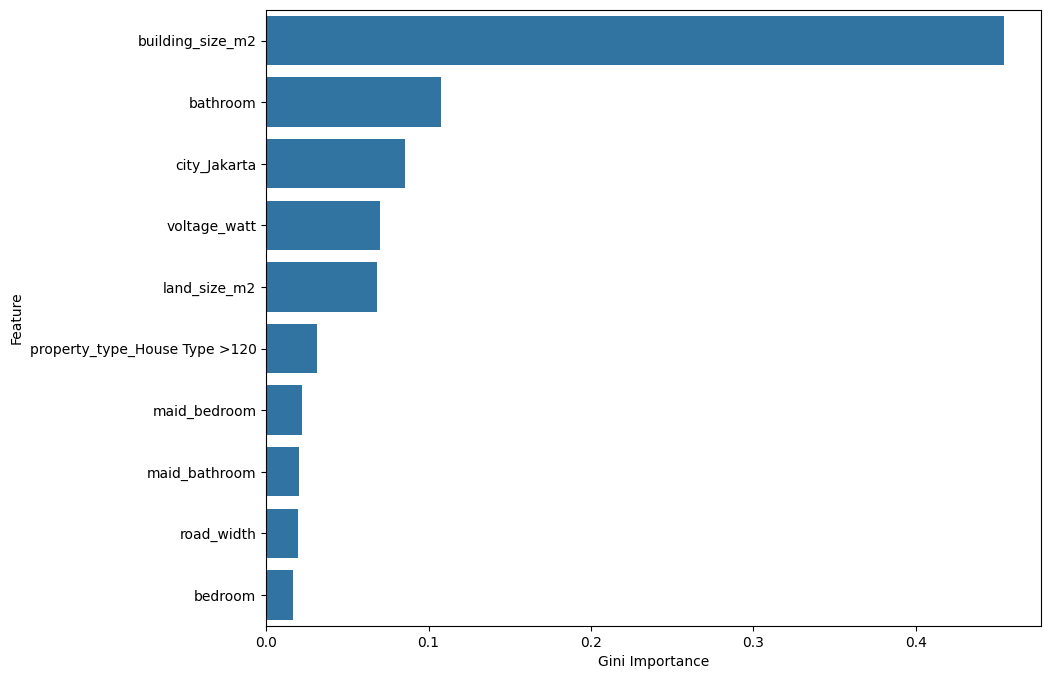

In [80]:
importances = best_model['model'].feature_importances_
feature_imp_df = pd.DataFrame({'Feature': num_cols+list(best_model['transformer']['encoder_ohe'].get_feature_names_out()), 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 

plt.figure(figsize=(10, 8))
sns.barplot(feature_imp_df.head(10), y='Feature', x='Gini Importance')
plt.show()

## Model Training Using Best Hyperparameter

In [81]:
# Predict train-set & test-set
y_train_predict = best_model.predict(X_train_imputed)
y_test_predict = best_model.predict(X_test_imputed)

## Model Evaluation Using Best Hyperparameter

In [85]:
# RMSE (Root Mean Squared Error) Train and Test:
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

print(f"Mean Absolute Error (MAE) - TRAIN: {mae_train:.2f}")
print(f"Mean Absolute Error (MAE) - TEST: {mae_test:.2f}")
print(f"R-squared (R2 Score) - TRAIN: {r2_train:.2f}")
print(f"R-squared (R2 Score) - TEST: {r2_test:.2f}")

Mean Absolute Error (MAE) - TRAIN: 234.36
Mean Absolute Error (MAE) - TEST: 574.64
R-squared (R2 Score) - TRAIN: 0.93
R-squared (R2 Score) - TEST: 0.72


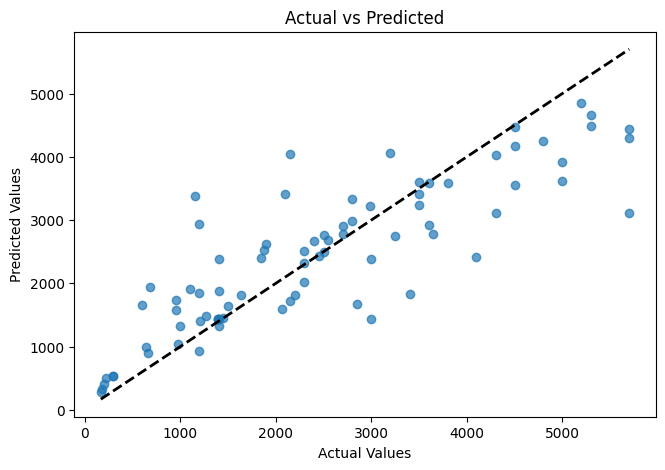

In [83]:
# Scatter plot
plt.figure(figsize=(7.5, 5))
plt.scatter(y_test, y_test_predict, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

## Model Saving

In [84]:
# Menyimpan model ke file
with open('data/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model berhasil disimpan!")

Model berhasil disimpan!
